In [ ]:
from Tools import *
from photoObject import *
import emcee
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import xmatch
from Tools import *

In [ ]:
def angstromTokms2(centralA,As):
    c=299792
    v=c*(As-centralA)/centralA
    return v


angstromTokms2(1215,)

In [32]:
def angstromTokms(centralA,As):
    c=299792
    v=c*(As-centralA)/centralA
    return v

def LineToRedshift(Obs,Rest):
    return (Obs/Rest)-1

def RedshiftToLine(Obs,z):
    return (Obs/(1+z))

In [33]:
#from astropy import units as u
#from astropy.coordinates import SkyCoord

#CatBino=ReadCatalogs("../Catalogs/Binospec-Candels.cat")
#Jorryt=ReadCatalogs("../Catalogs/jorryt.txt")
#JorrytC=SkyCoord(Jorryt["col2"],Jorryt["col3"])
#idx,d2d=xmatch.xmatch(JorrytC.ra,JorrytC.dec,CatBino["ra_candels"],CatBino["dec_candels"])

In [34]:
CatBino=ReadCatalogs("../Catalogs/Binospec-Candels.cat")
CatBino=CatBino[CatBino["Type"]=="NonDetect"]
Fresco=ReadCatalogs("../Catalogs/Fresco.cat")

idx,d2d=xmatch.xmatch(CatBino["ra_candels"],CatBino["dec_candels"],Fresco["ra"],Fresco["dec"])
mask=[]
for i,d in zip(idx,d2d):
    print(i,d)
    if d.value<(0.5/3600.):
        mask.append(True)
    else:
        mask.append(False)


CatBino=CatBino[mask]
idx=idx[mask]
d2d=d2d[mask]
Fresco=[Fresco[i] for i in idx]


ids=[]
Fresco2,Bino2 = [],[]

# iterate through each element in the original array
for i,element in enumerate(Fresco):
    # add the element to the new list if it is not already there
    if element["id"] not in ids:
        Fresco2.append(element)
        Bino2.append(CatBino[i])
    else:
        print(CatBino[i]["id_charlotte"])
    ids.append(element["id"])

Fresco=Fresco2
CatBino=Bino2




10076 0d02m11.7963407s
357 0d01m39.45857985s
659 0d02m04.04264315s
5233 0d00m00.04625476s
3922 0d00m00.13341468s
8021 0d00m00.11050218s
5673 0d00m00.06571456s
10934 0d00m00.07652479s
4046 0d00m00.09450469s
10088 0d03m07.05756248s
10217 0d03m43.61790971s
172 0d02m08.63108684s
6155 0d01m24.15622099s
367 0d03m56.40193372s
1060 0d01m13.41257253s
6153 0d02m45.17638793s
226 0d00m37.91197029s
3867 0d00m10.98122542s
1372 0d00m32.5180257s
226 0d02m55.71413657s
226 0d02m26.63750584s
11103 0d00m46.60840788s
2170 0d02m00.69262736s
5686 0d00m52.98817239s
11383 0d01m02.2015863s
357 0d01m06.58819069s
10603 0d00m56.78366666s
1356 0d02m30.39002386s
3169 0d01m16.81918311s
2182 0d02m25.0075985s
2182 0d02m25.68991103s
173 0d02m05.20435732s
6207 0d01m04.75856002s
457 0d00m48.30866889s
9112 0d01m20.66604175s
4804 0d00m00.08502522s
5152 0d00m00.13422938s
9112 0d00m12.18078823s
6749 0d00m00.23801245s
367 0d00m14.76974568s
9109 0d01m10.49748099s
173 0d01m25.93206984s
4662 0d00m00.05303018s
173 0d00m09.15411159

In [35]:
i=0
for f,b in zip(Fresco,CatBino):
    print(i,f["id"],b["id_charlotte"])
    i=i+1

0 19151 z6_GND_16819
1 21117 z5_GND_14430
2 7709 z5_GND_30190
3 29544 z5_GND_42418
4 20214 z5_GND_15562
5 26948 z5_GND_44499
6 11054 z6_GND_25736
7 11289 z6_GND_25400
8 15370 z6_GND_20879
9 858 z6_GND_3649
10 6255 z5_GND_32273
11 11461 z6_GND_25195
12 10114 z6_GND_27453
13 8915 z6_GND_28438
14 16542 z6_GND_19665
15 23597 z6_GND_11494
16 27064 z6_GND_8220
17 26178 z6_GND_8934
18 24414 z5_GND_10574
19 24849 z6_GND_10131
20 28976 z6_GND_43125
21 30113 z6_GND_41463
22 761 z6_GNW_11480
23 3516 z6_GND_36607
24 6130 z6_GND_32408
25 6900 z6_GND_31259
26 9109 z6_GND_28182
27 16069 z6_GND_20167
28 13668 z6_GND_22665
29 13485 z6_GND_22789
30 13820 z7_GND_22525
31 4628 z7_GND_34860
32 4707 z7_GND_34730
33 21379 z5_GND_13996
34 23742 z6_GND_11304
35 24719 z6_GND_10245
36 29272 z7_GND_42808
37 28934 z6_GND_7095
38 30028 z7_GND_41647
39 20180 z7_GND_15642
40 19199 z7_GND_16759
41 67 z6_GNW_8973
42 4493 z5_GND_35084
43 459 z5_GNW_10657
44 2152 z5_GNW_13431
45 24197 z5_GND_45250
46 6061 z5_GND_32576
47

In [36]:
LyaFlux=[gal["LyaFlux"] for gal in CatBino]
ids=[gal["id_charlotte"] for gal in CatBino]
ra=[gal["ra_candels"] for gal in CatBino]
dec=[gal["dec_candels"] for gal in CatBino]

LyaFlux=10**np.array(LyaFlux)
lines=ascii.read("../Catalogs/HaLines.cat")
DetectionLimit=2e-18
HaFlux=[]

for f in LyaFlux:
    HaFlux.append(f/0.2/8.7)



In [37]:
#count=0
#for i,f,r,d in zip(ids,HaFlux,ra,dec):
#    if lines[count]["Ha"]=="X" and lines[count]["Oiii"]=="X":
#        if f<DetectionLimit:
#            print(i,f,r,d,"  Undetectable")
#        if f>=DetectionLimit:
#            print(i,f,r,d,"  detectable")
#    count=count+1

In [38]:
import os
FrescMeta={}
for i in range(0,len(CatBino)):
    #if len(str(Fresco[i]["id"]))==5:
    #    FrescMeta[str(CatBino[i]["id_charlotte"])]=[str(Fresco[i]["id"]),CatBino[i]['photoz']]
    #    os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_'+str(Fresco[i]["id"])+'.1D.fits')
    #    os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_'+str(Fresco[i]["id"])+'.stack.fits')
    #if len(str(Fresco[i]["id"]))==4:
    #    FrescMeta[str(CatBino[i]["id_charlotte"])]=["0"+str(Fresco[i]["id"]),CatBino[i]['photoz']]
    #    os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_0'+str(Fresco[i]["id"])+'.1D.fits')
    #    os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_0'+str(Fresco[i]["id"])+'.stack.fits')
    #if len(str(Fresco[i]["id"]))==3:
    #    FrescMeta[str(CatBino[i]["id_charlotte"])]=["00"+str(Fresco[i]["id"]),CatBino[i]['photoz']]
    #    os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_00'+str(Fresco[i]["id"])+'.1D.fits')
    #    os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_00'+str(Fresco[i]["id"])+'.stack.fits')
    if len(str(Fresco[i]["id"]))==2:
        print(i,Fresco[i]["id"],CatBino[i]["id_charlotte"],CatBino[i]['photoz'],6564.614*(1+CatBino[i]['photoz']),Fresco[i]["ra"],CatBino[i]["ra_candels"])
        FrescMeta[str(CatBino[i]["id_charlotte"])]=["00"+str(Fresco[i]["id"]),CatBino[i]['photoz']]
        os.system('wget -P ../data/large_files/Fresco/https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_000'+str(Fresco[i]["id"])+'.1D.fits')
        print('https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_000'+str(Fresco[i]["id"])+'.1D.fits')
        os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_000'+str(Fresco[i]["id"])+'.stack.fits')


41 67 z6_GNW_8973 5.62 43457.744679999996 189.16778966 189.16779165
https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_00067.1D.fits


In [39]:
redsh=LineToRedshift(47220,6564.614)
print(redsh)
print(RedshiftToLine(8155,redsh))
print(RedshiftToLine(48590,redsh))
print("Lya Counterpart: ",1215.670*(1+redsh))
print("Separation: ",5893.799472295514-5275.857519788919)
print(6564.6+618)

6.193111430466438
1133.723574121135
6755.073999576451
Lya Counterpart:  8744.449772675134
Separation:  617.941952506595
7182.6


In [40]:
ids=[]
for i,j in zip(Fresco,CatBino):
    if len(str(i["id"])) == 2:
        num = "000" + str(i["id"])
    elif len(str(i["id"])) == 3:
        num = "00" + str(i["id"])
    elif len(str(i["id"])) == 4:
        num = "0" + str(i["id"])
    else:
        num=str(i["id"])
    ids.append(num)

In [41]:
LyaFlux[20]

nan

In [42]:
f=fits.open("../data/large_files/Fresco/fresco-gdn-med_"+ids[i]+".1D.fits")

f[1].header

TypeError: list indices must be integers or slices, not Row

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
19151
5.55
38208.584494237555 50802.54773372237


<ipython-input-44-92265ecfb50c>:75: RuntimeWarning: invalid value encountered in true_divide
  sig=np.nanstd(f[1].data["flux"]/f[1].data["flat"])


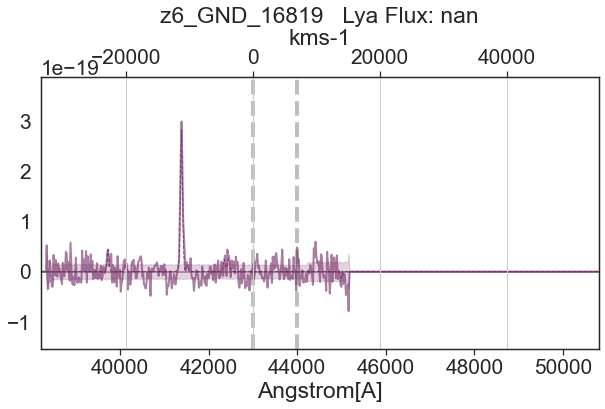

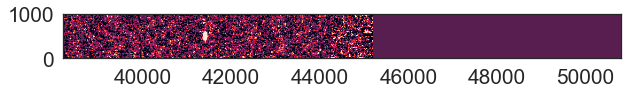

In [44]:
from scipy import interpolate
import matplotlib
import ipympl
%load_ext autoreload
%autoreload 
%matplotlib inline
i=3
i=i-3
print(ids[i])
print(CatBino[i]['photoz'])
f=fits.open("../data/large_files/Fresco/fresco-gdn-med_"+ids[i]+".1D.fits")
f2D=fits.open("../data/large_files/Fresco/2D/fresco-gdn-med_"+ids[i]+".stack.fits")
sns.set_theme(style="white",font_scale = 1.9)
plt.rcParams["figure.figsize"] = (10,5)
fig, ax1 = plt.subplots()

Ha=6564.614*(1+CatBino[i]['photoz'])
Oiii=5008.239*(1+CatBino[i]['photoz'])
Sii=6716.440*(1+CatBino[i]['photoz'])
print(min(f[1].data["wave"]),max(f[1].data["wave"]))
Wave=angstromTokms(Ha,f[1].data["wave"])
oriWave=f[1].data["wave"]


ax1.axhline(y=0,color="#702963",alpha=0.6)
ax1.plot(oriWave,f[1].data["line"]/max(f[1].data["flat"]),lw=1,color="#702963",ls="--",alpha=0.8,zorder=0)
ax1.plot(oriWave,f[1].data["flux"]/max(f[1].data["flat"]),lw=2,color="#702963",alpha=0.6,zorder=100)

ax1.fill_between(oriWave,-f[1].data["err"]/max(f[1].data["flat"]),f[1].data["err"]/max(f[1].data["flat"]),color='#702963',alpha=0.2,zorder=-10)

ax1.set_xlabel("Angstrom[A]")
ax1.tick_params('y')


# Create the second x-axis
ax2 = ax1.twiny()

ax2.plot(Wave,f[1].data["line"]/max(f[1].data["flat"])," ")
ax2.tick_params('y', colors='r')
ax2.set_xlabel("kms-1")

#ax2.set_xticklabels([ np.round(angstromTokms(lya,w)+Offset,2) for w in ax1.get_xticks()])

#ax2.set_xticks(Wave)
#ax2.set_xticklabels(Wave)


ax1.axvline(x=Ha,ls="--",color="grey",label="Expected Ha",alpha=0.5,lw=4,zorder=0)
ax1.axvline(x=Sii,ls="--",color="grey",label="Expected Ha",alpha=0.5,lw=4,zorder=0)

ax1.axvline(x=Oiii,ls="--",color="green",label="Expected oiii",alpha=0.5,lw=4,zorder=0)

interp = interpolate.interp1d(oriWave, Wave)



Limit=False

if Limit!=False:
    x_min = Limit-500#min(oriWave)
    x_max = Limit+500#max(oriWave)
    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(interp(x_min), interp(x_max))
    mask=(np.array(oriWave)>x_min) & (np.array(oriWave)<x_max)
    datos=(f[1].data["flux"]/f[1].data["flat"])[mask]
    ax1.set_ylim(np.min(datos)*1.3, np.max(datos)*1.3)



if Limit==False:
    x_min = min(oriWave)
    x_max = max(oriWave)
    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(interp(x_min), interp(x_max))
    sig=np.nanstd(f[1].data["flux"]/f[1].data["flat"])
    ax1.set_ylim(-2*sig, 5*sig)
plt.title(str(CatBino[i]['id_charlotte'])+"   Lya Flux: "+str(LyaFlux[i]))

plt.grid()

plt.show()

plt.rcParams["figure.figsize"] = (12,5)
fig, ax1 = plt.subplots()
ax1.imshow(f2D[1].data,extent=[min(oriWave),max(oriWave),0,1000],aspect=1,vmin=-0.003,vmax=0.01,)
ax1.set_xlim(x_min, x_max)


plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<ipython-input-30-6c5fb86b4781>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  zspec=(np.float(HaCat[i]["Ha"])/6562.8)-1
<ipython-input-30-6c5fb86b4781>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  zspec=(np.float(HaCat[i]["Oiii"])/5006.8)-1


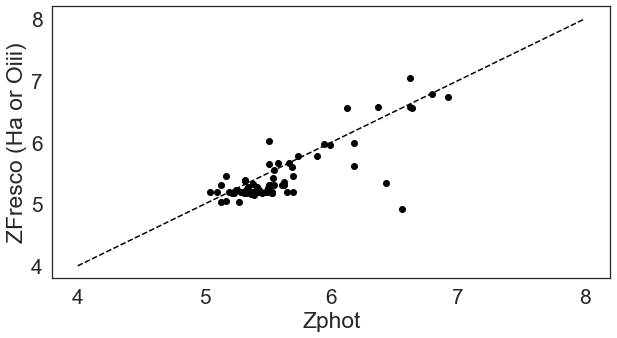

In [30]:
%load_ext autoreload
%autoreload
from photoObject import *
PObj=[]
HaCat=ascii.read("../Catalogs/HaLinesNonDetect.cat")
for i in range(0,len(HaCat)):
    #print(ids[i],HaCat[i]["ID"],HaCat[i]["Ha"])

    zphot=CatBino[i]['photoz']
    zspec=np.nan

    if HaCat[i]["Ha"]=="X" and HaCat[i]["Oiii"]=="X":
        zspec=np.nan
    elif HaCat[i]["Ha"]=="X":
        zspec=(np.float(HaCat[i]["Oiii"])/5006.8)-1
    elif HaCat[i]["Oiii"]=="X":
        zspec=(np.float(HaCat[i]["Ha"])/6562.8)-1      

    plt.scatter(zphot,zspec,color="black")

plt.plot([4,8],[4,8],color="black",ls="--")
plt.xlabel("Zphot")
plt.ylabel("ZFresco (Ha or [Oiii])")
plt.show()



## Fitting

In [ ]:
def FitGaussian(wave,Flux,FluxErr,lineWave,ShowPlots=True):
    inValues=[1,lineWave,5,0]
    labels = ["Amp","Mean", "FWHM","C"]

    stp=1500
    discard=1000
    walknum=50
    sampler,logprob=MCMC.runMCMC([wave,Flux,FluxErr],inValues,lineWave,steps=stp,nwalkers=walknum)
    if ShowPlots==True:
        MCMC.plotChain(sampler,labels)
        MCMC.plotCorner(sampler,labels,discard=discard)
        MCMC.plotModels(sampler,wave,Flux,FluxErr,discard=discard)

    pairs,ampVals,meanVals,stdVals,cVals=MCMC.returnParameters(sampler,discard=discard)
    return meanVals,stdVals#betaVals[1],MuvVals[1],[betaErr,MuvErr],[Flux,FluxErr],pairs


In [ ]:
%load_ext autoreload
%autoreload
ln=["Ha","Oiii"]
for gal in PObj:
    print(gal.ID)
    f=fits.open("../data/large_files/Fresco/fresco-gdn-med_"+gal.IDFresco+".1D.fits")
    wave,flux,err=f[1].data["wave"],f[1].data["flux"],f[1].data["err"]

    tempM={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}
    tempS={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}

    for l in ln:
        if getattr(gal, "aWave"+l)=="X":
            continue
        
        approxWave=float(getattr(gal, "aWave"+l))
        mask=(wave>approxWave-200)&(wave<approxWave+200)
        wave,flux,err=wave[mask],flux[mask],err[mask]
        #flux[flux<0]=0.0
        #plt.plot(wave,flux)
        #plt.show()
        m,s=FitGaussian(wave,flux,err,approxWave,ShowPlots=False)
        tempM[l]=m
        tempS[l]=s
    gal.giveWave(tempM)
    gal.giveFWHM(tempS)
    


In [ ]:
%load_ext autoreload
%autoreload
for gal in PObj:
    gal.getOffset()
    gal.getFWHM()


In [ ]:
#Alldata=[slopes,Muv,FWHM,LyaLum,Skewness,EW,maskLAE,cat,dEW,dSlp,dMuv
AllData=np.load("../Catalogs/AllData.npy",allow_pickle=True).transpose()
for gal in PObj:
    for data in AllData:
        if gal.ID==data[7][1]:
            setattr(gal,"Muv",[data[1],data[10]])
            setattr(gal,"EW",[data[5],data[8]])


In [ ]:
Muvs=np.array([gal.Muv for gal in PObj])
Ews=[gal.EW[0] for gal in PObj]
Offset=np.array([gal.off for gal in PObj])
FWHM=[gal.fwhm[1] for gal in PObj]
zs=[gal.zLya for gal in PObj]


def GetPlottable(vals):
    val=vals[:,1]
    val_minus=np.abs(vals[:,1]-vals[:,0])
    val_plus=np.abs(vals[:,2]-vals[:,1])
    return np.array([val,val_minus,val_plus])

Offset=GetPlottable(Offset)

def AddIntrinsic(Offset):
    O1=np.sqrt(Offset[1]**2+60**2)
    O2=np.sqrt(Offset[2]**2+60**2)
    return[Offset[0],O1,O2]

#Offset=AddIntrinsic(Offset)

np.save("../Catalogs/Muvs.npy",Muvs.transpose())
np.save("../Catalogs/Offset.npy",Offset)
np.save("../Catalogs/zs.npy",zs)

In [ ]:
plt.scatter(Muvs[:,0],Offset[0])
plt.show()

plt.scatter(Ews,Offset[0])
plt.xlim()
plt.show()

#plt.scatter(FWHM,Offset)
#plt.show()

In [ ]:
for p in PObj:
    print(p.ID,p.off[1])

In [ ]:
list(Ews)

In [ ]:
list(Offset[0])